In [3]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model, svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# EDA

In [4]:
csv = pd.read_csv('../data/raw/heart.csv', sep=',')
csv.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg] -> presión arterial en reposo
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression] 
#   oldpeak = Depresión del ST inducida por el ejercicio en relación con el reposo
#   La depresión del ST en el ECG al ingreso indica lesiones coronarias graves
#   El segmento ST abarca la región entre el final de la despolarización ventricular y el comienzo de la repolarización ventricular.
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] -> la pendiente del segmento ST de ejercicio máximo
# HeartDisease: output class [1: heart disease, 0: Normal]

In [6]:
csv.shape

(918, 12)

In [7]:
csv.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [8]:
csv.HeartDisease.unique()

array([0, 1], dtype=int64)

In [9]:
csv.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
csv.loc[csv['RestingBP']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [11]:
csv.loc[csv['Cholesterol']==0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [12]:
df = csv[csv.Cholesterol != 0]
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df.shape

(746, 12)

In [14]:
csv.shape[0]-df.shape[0]

172

In [15]:
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


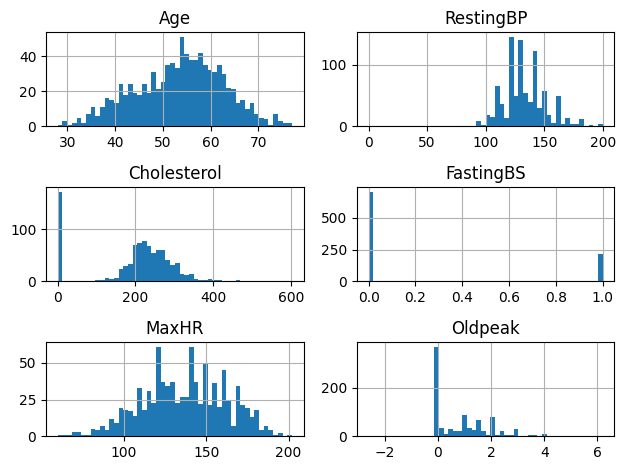

In [16]:
csv.drop(['HeartDisease'],1).hist(bins=50)
plt.tight_layout()

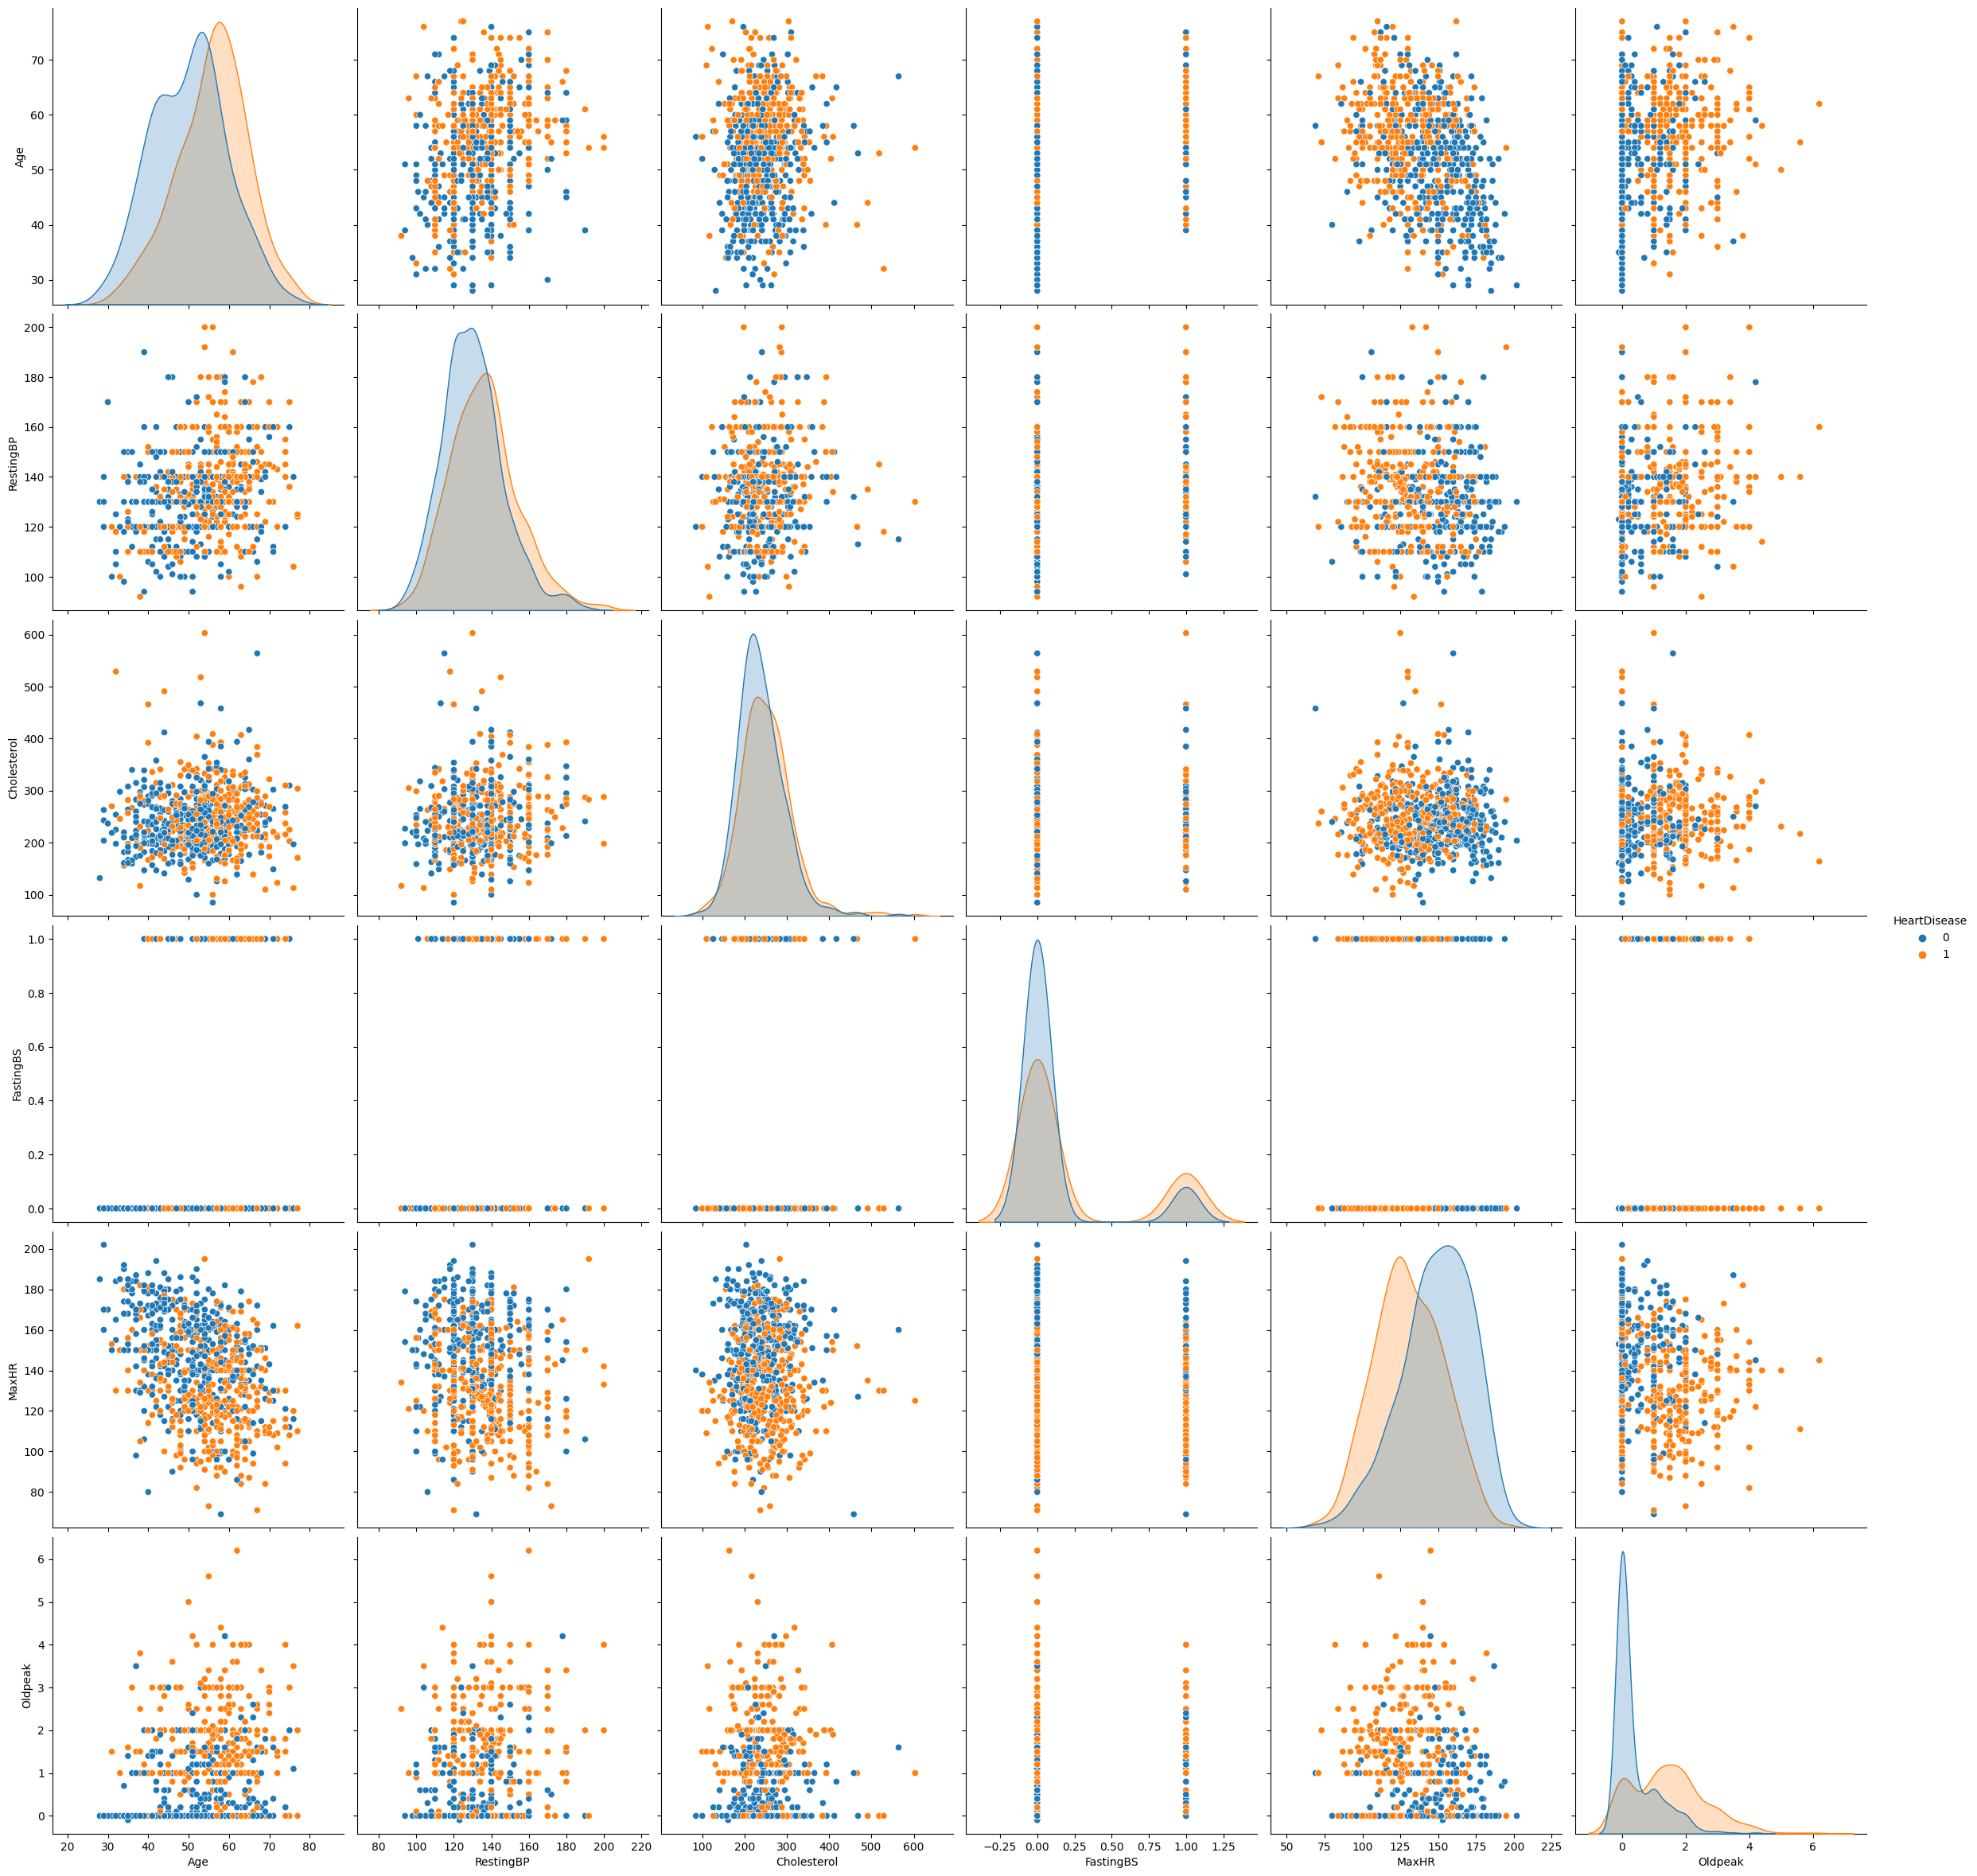

In [17]:
sns.pairplot(df,
             hue='HeartDisease',
             height=4,
             vars=["Age", "RestingBP", "Cholesterol", "FastingBS", "MaxHR", "Oldpeak"],
             kind="scatter");

#### Matriz de correlación de variables numéricas

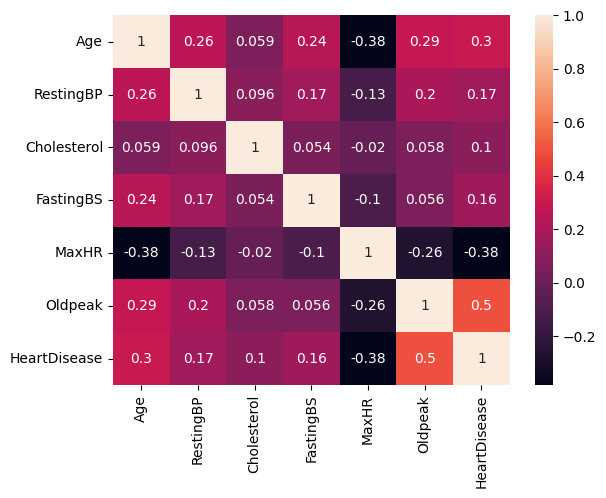

In [18]:
sns.heatmap(df.corr(), annot=True) ;

### Get Dummies

In [19]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [20]:
get_dumm_df = pd.get_dummies(df, drop_first=True)
get_dumm_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [21]:
get_dumm_df.shape

(746, 16)

In [22]:
get_dumm_df.dtypes

Age                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
Oldpeak              float64
HeartDisease           int64
Sex_M                  uint8
ChestPainType_ATA      uint8
ChestPainType_NAP      uint8
ChestPainType_TA       uint8
RestingECG_Normal      uint8
RestingECG_ST          uint8
ExerciseAngina_Y       uint8
ST_Slope_Flat          uint8
ST_Slope_Up            uint8
dtype: object

#### Matriz de correlación de variables categóricas

In [23]:
get_dumm_df_nodrop = pd.get_dummies(df)
get_dumm_df_nodrop.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'RestingECG_LVH', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_N', 'ExerciseAngina_Y', 'ST_Slope_Down',
       'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [24]:
get_dumm_df_nodrop.shape

(746, 21)

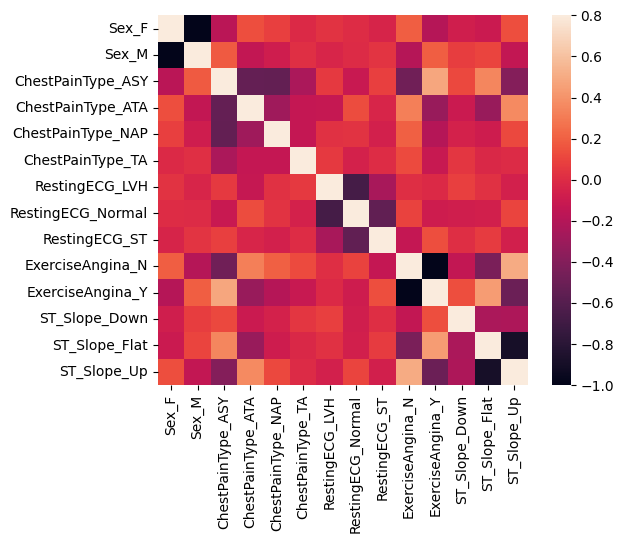

In [25]:
corrmat = get_dumm_df_nodrop[['Sex_F','Sex_M','ChestPainType_ASY','ChestPainType_ATA','ChestPainType_NAP','ChestPainType_TA','RestingECG_LVH',
                        'RestingECG_Normal','RestingECG_ST','ExerciseAngina_N','ExerciseAngina_Y','ST_Slope_Down','ST_Slope_Flat',
                        'ST_Slope_Up']].corr()
sns.heatmap(corrmat, vmax=.8, square=True);

In [26]:
get_dumm_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

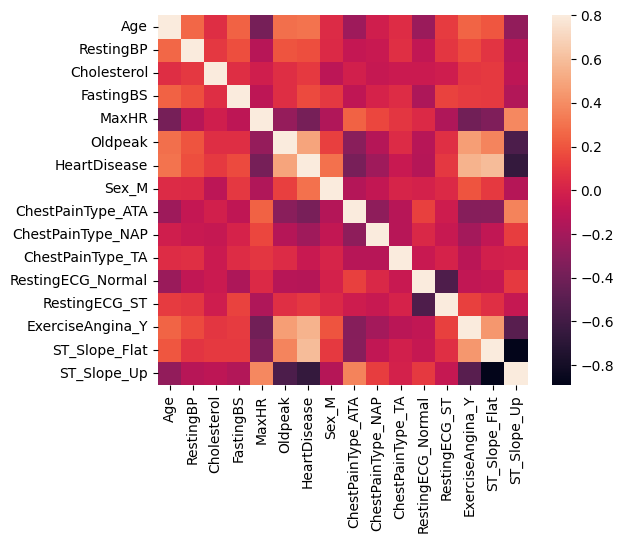

In [27]:
corrmat = get_dumm_df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

In [48]:
get_dumm_df.to_csv('../data/processed/processed_data_V1.csv')

In [51]:
get_dumm_df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

### Train/Test

In [28]:
X = np.array(get_dumm_df.drop(['HeartDisease'], axis = 1))
y = np.array(get_dumm_df['HeartDisease'])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state = 42)

In [30]:
X_train.shape

(596, 15)

In [31]:
X_test.shape

(150, 15)

### Regresión logística

In [32]:
model = linear_model.LogisticRegression(solver='liblinear', multi_class = "auto")
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

accuracy_score 0.893
precision_score 0.932
recall_score 0.8607594936708861
f1_score 0.895
roc_auc_score 0.895


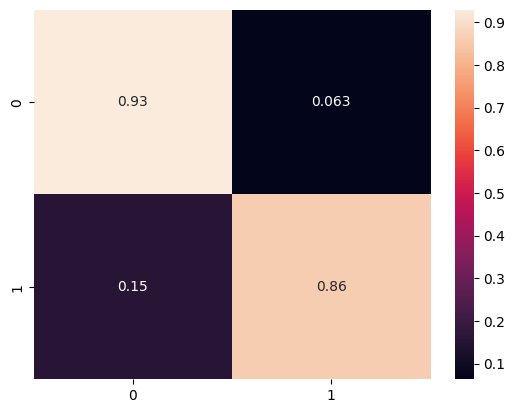

In [33]:
c_mat = confusion_matrix(y_test,y_pred)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
print('accuracy_score', accuracy_score(y_test,y_pred).round(3))
print('precision_score', precision_score(y_test, y_pred).round(3))
print('recall_score', recall_score(y_test, y_pred.round(3)))
print('f1_score', f1_score(y_test, y_pred).round(3))
print('roc_auc_score', roc_auc_score(y_test, y_pred).round(3))

In [34]:
name='Logistic Regression'
kfold = KFold(n_splits=10) #Parte los datos en 10 trozos para usar validación cruzada / cross validation
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='recall')

msg_model_scl = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(cv_results)
print(msg_model_scl)

[0.875      0.85714286 0.85185185 0.82758621 0.81818182 0.75
 0.77419355 0.75       0.86206897 0.96428571]
Logistic Regression: 0.833031 (0.061861)


### Naive_Bayes_Gaussian

In [35]:
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train, y_train)
gnb_pred = fit_std.predict(X_test)

In [36]:
print('Acc: ',accuracy_score(y_test,gnb_pred).round(3))
print('Pre: ',precision_score(y_test, gnb_pred).round(3))
print('Rec: ',recall_score(y_test, gnb_pred).round(3))
print('f1: ',f1_score(y_test, gnb_pred).round(3))
print('roc: ',roc_auc_score(y_test, gnb_pred).round(3))

Acc:  0.887
Pre:  0.908
Rec:  0.873
f1:  0.89
roc:  0.887


### Comparamos valores de recall entre ambos modelos

In [37]:
# Log. Regression
pred_train_std_model = model.predict(X_train)

print('LogisticRegression')
print('\nPrediction recall for the training dataset')
print('{:.2%}'.format(metrics.recall_score(y_train, pred_train_std_model)))

pred_test_std_model = model.predict(X_test)

print('\nPrediction recall for the test dataset')
print('{:.2%}\n'.format(metrics.recall_score(y_test, pred_test_std_model)))

LogisticRegression

Prediction recall for the training dataset
86.28%

Prediction recall for the test dataset
86.08%



In [38]:
# Gaussian
from sklearn import metrics
pred_train_std_gb = fit_std.predict(X_train)

print('GaussianNB')
print('\nPrediction recall for the training dataset')
print('{:.2%}'.format(metrics.recall_score(y_train, pred_train_std_gb)))

pred_test_std_gb = fit_std.predict(X_test)

print('\nPrediction recall for the test dataset')
print('{:.2%}\n'.format(metrics.recall_score(y_test, pred_test_std_gb)))

GaussianNB

Prediction recall for the training dataset
84.12%

Prediction recall for the test dataset
87.34%



In [39]:
print('Logistic Regression Train','\n', metrics.confusion_matrix(y_train, pred_train_std_model))
print('Gaussian Train','\n', metrics.confusion_matrix(y_train, pred_train_std_gb))

Logistic Regression Train 
 [[273  46]
 [ 38 239]]
Gaussian Train 
 [[274  45]
 [ 44 233]]


In [40]:
print('Logistic Regression Test','\n', metrics.confusion_matrix(y_test, pred_test_std_model))
print('Gaussian Test','\n', metrics.confusion_matrix(y_test, pred_test_std_gb))

Logistic Regression Test 
 [[66  5]
 [11 68]]
Gaussian Test 
 [[64  7]
 [10 69]]


# PIPELINE

In [41]:
GaussianNB().get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [42]:
reg_log = Pipeline(steps = [
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("reglog", LogisticRegression())])

# gnb = Pipeline(steps = [
#     ("scaler", StandardScaler()),
#     ("gnb", GaussianNB())])
    
svc = Pipeline([
    ("scaler", StandardScaler()),
    ("selectkbest", SelectKBest()),
    ("svc", svm.SVC())])

rand_forest_param = {
    'n_estimators': [10,50,100,500,1000],
    'max_features': [1,2,3,4,5],
    'min_samples_leaf' : [5,10,20],
    'max_depth' : [3,5,7,10]
}

rand_forest = RandomForestClassifier()

re_log_param = {
    "imputer__strategy": ['mean', 'median', 'most_frequent'],
    "reglog__penalty": ["l1", "l2"],
    "reglog__C": np.arange(0.1, 4, 0.5)
}

# gnb_param = {'priors': [0,1,2],
#              'var_smoothing': [1e-09, 1e-05, 1e-01]}


svc_param = {
    "selectkbest__k": [1,2,3],
    "svc__C": np.arange(0.1, 0.9, 0.1),
    "svc__kernel": ['linear', 'poly', 'rbf']
}

gs_reg_log = GridSearchCV(reg_log,
re_log_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)

# gs_gnb = GridSearchCV(gnb,
# gnb_param,
# cv=10,
# scoring = 'recall',
# n_jobs = -1,
# verbose = 1)

gs_svm = GridSearchCV(svc,
svc_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)

gs_rand_forest = GridSearchCV(rand_forest,
rand_forest_param,
cv=10,
scoring = 'recall',
n_jobs = -1,
verbose = 1)

grids = {
    "gs_reg_log": gs_reg_log,
    # "gs_gnb" : gs_gnb,
    "gs_svm": gs_svm,
    "gs_rand_forest": gs_rand_forest}

In [43]:
for nombre, grid_search in grids.items():
    grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 72 candidates, totalling 720 fits
Fitting 10 folds for each of 300 candidates, totalling 3000 fits


In [44]:
best_grids = [(i, j.best_score_) for i, j in grids.items()]
best_grids

[('gs_reg_log', 0.8342592592592594),
 ('gs_svm', 0.8698412698412697),
 ('gs_rand_forest', 0.8736772486772487)]

In [50]:
print("Best estimator:", gs_svm.best_estimator_)
print("Best params:", gs_svm.best_params_)
print("Best score:", gs_svm.best_score_)

Best estimator: Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=1)),
                ('svc', SVC(C=0.1, kernel='linear'))])
Best params: {'selectkbest__k': 1, 'svc__C': 0.1, 'svc__kernel': 'linear'}
Best score: 0.8698412698412697


In [46]:
y_pred_svm = gs_svm.predict(X_test)

In [47]:
print('SVM Test','\n', metrics.confusion_matrix(y_test, y_pred_svm))

SVM Test 
 [[59 12]
 [ 9 70]]
